
### Model  3
Team member names:  Ye Shi, Shiqi Zhang

### To do:  
1. Specify the model number above and indicate the team member names.
- Specify your model structure below. 
- Restart kernel and run all.
- Answer the questions in the next text box.
- Print to pdf.
- Combine the pdfs for the 3 models into a single pdf.
- Submit on gradescope.  


### Questions:  
Give brief (one or two sentence) answers to the questions below.

Q1: What are the pros and cons of this model? 

Answer: Parameters are reduced due to the pre trainned VGG-16. However, the accuracy is bad.

Q2:  What do you think would be an efficient way to improve accuracy for this model and why?  This is not so much about being right or wrong as about making an informed hypothesis in response to an experiment. 

Answer: 1. Build deeper fully connnected layers at before output. 2. Use the first method, and run the convolutional base of the VGG 16 and replace it in the model.

In [0]:
import keras
keras.__version__

'2.2.4'

### Model specification

Define the structure of your model and display it in the next section of code.

In [0]:
from keras import layers
from keras import models
from keras.applications import VGG16

# VGG-16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

# Model definition
model = models.Sequential()

# Replace with your model:

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_initializer='glorot_normal',activation='relu'))
model.add(layers.Dense(128,kernel_initializer='glorot_normal', activation='relu'))
model.add(layers.Dense(10, kernel_initializer='glorot_normal',activation='softmax'))

model.summary()
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 14,798,154
Trainable params: 14,798,154
Non-trainable params: 0
_________________________________________________________________
This is the number of trainable weights before freezing the conv base: 32
This is the number of trainable weights after freezing t

### Prepare the data.  
You don't need to change this section.  

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Compile the model and test before training.   
You don't need to change this section.  

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Untrained accuracty = ' + str(test_acc))


10000/10000 [==============================] - 6s 581us/step
Untrained accuracty = 0.0997


### Train the model.  
You don't need to change this section.    

In [0]:

num_epochs = 10
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=num_epochs, batch_size=64)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 20s 441us/step - loss: 1.4116 - acc: 0.5046 - val_loss: 1.3889 - val_acc: 0.5072
Epoch 2/10
45000/45000 [==============================] - 19s 429us/step - loss: 1.2118 - acc: 0.5738 - val_loss: 1.3082 - val_acc: 0.5334
Epoch 3/10
45000/45000 [==============================] - 19s 429us/step - loss: 1.1429 - acc: 0.5991 - val_loss: 1.2323 - val_acc: 0.5732
Epoch 4/10
45000/45000 [==============================] - 20s 439us/step - loss: 1.0985 - acc: 0.6159 - val_loss: 1.2327 - val_acc: 0.5562
Epoch 5/10
45000/45000 [==============================] - 19s 429us/step - loss: 1.0574 - acc: 0.6306 - val_loss: 1.2043 - val_acc: 0.5806
Epoch 6/10
45000/45000 [==============================] - 19s 429us/step - loss: 1.0255 - acc: 0.6400 - val_loss: 1.1725 - val_acc: 0.5960
Epoch 7/10
45000/45000 [==============================] - 19s 430us/step - loss: 0.9962 - acc: 0.6523 - val_loss: 1.2

### Plot the loss and accuracy as a function of epoch. 
You don't need to change this section.  

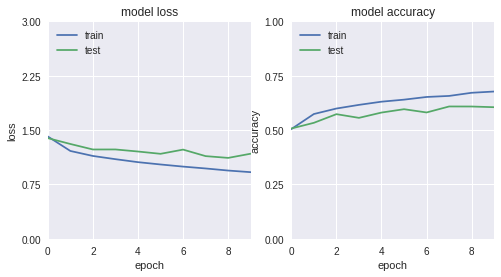

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training(history):
  ncols = 2
  keywords = ['loss', 'acc']
  names = ['loss', 'accuracy']
  fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(8, 4))
 
  for ax, ind, keyword, name in zip(axs.flat, range(ncols), keywords, names):
    ylim = [3, 1][ind]
    data = history.history[keyword]
    ax.plot(data)
    ax.plot(history.history['val_' + keyword])
    ax.set_title('model ' + name)
    ax.set_xlabel('epoch')
    ax.set_ylabel(name)
    ax.set_xlim([0, len(data)-1])
    ax.set_ylim([0, ylim])
    ax.set_xticks(range(0, len(data), 2))
    ax.set_yticks(np.linspace(0, ylim, 5))
    ax.legend(['train', 'test'], loc='upper left')
    
  plt.show()
 
 
plot_training(history)

### Evaluate the trained model on the test data.

You don't need to change this section.  

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy on test images is ' + str(test_acc))

10000/10000 [==============================] - 5s 522us/step
Accuracy on test images is 0.5948
